Лабораторна робота №9 Гончар Назар ФІТ 4-8 Варіант 7

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Провести повний аналіз даних. Завантажити датасет. Вивести перші 5 рядків. Вивести розмір датасету, наявність пропущених даних, типи даних. Вивести матрицю кореляції. Вивевести кореляцію із цільовою функцією.
file_path = '/content/drive/My Drive/mushroom_cleaned.csv'
df = pd.read_csv(file_path)

print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
print("Розмір датасету:\n", df.shape)
print("\nКількість пропущених значень у кожному стовпці:\n", df.isnull().sum())
print("\nТипи даних у кожному стовпці:\n", df.dtypes)

Розмір датасету:
 (54035, 9)

Кількість пропущених значень у кожному стовпці:
 cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Типи даних у кожному стовпці:
 cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [ ]:
correlation_matrix = df.corr()
correlation_with_class = correlation_matrix['class']
correlation_with_class

,class
cap-diameter,-0.165676
cap-shape,-0.133338
gill-attachment,-0.052541
gill-color,-0.063947
stem-height,0.183354
stem-width,-0.182856
stem-color,-0.128339
season,-0.082919
class,1.000000


In [ ]:
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("\nТочність логістичної регресії:", accuracy_score(y_test, y_pred_log_reg))
print("\nМатриця плутанини:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred_log_reg))


Точність логістичної регресії: 0.6348775522793165

Матриця плутанини:
 [[3926 3423]
 [2496 6366]]

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.63     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.63      0.63     16211



In [ ]:
# 2. Побудувати дві моделі класифікації на вибір (наприклад, Випадковий ліс і логістичну регресію), підібрати параметри. Оцінити моделі. Вибрати найкращу. Вивести метрики, матрицю плутанини, класифікаційний звіт.
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("\nТочність випадкового лісу:", accuracy_score(y_test, y_pred_rf))
print("\nМатриця плутанини:\n", confusion_matrix(y_test, y_pred_rf))
print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred_rf))


Точність випадкового лісу: 0.990747023625933

Матриця плутанини:
 [[7273   76]
 [  74 8788]]

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



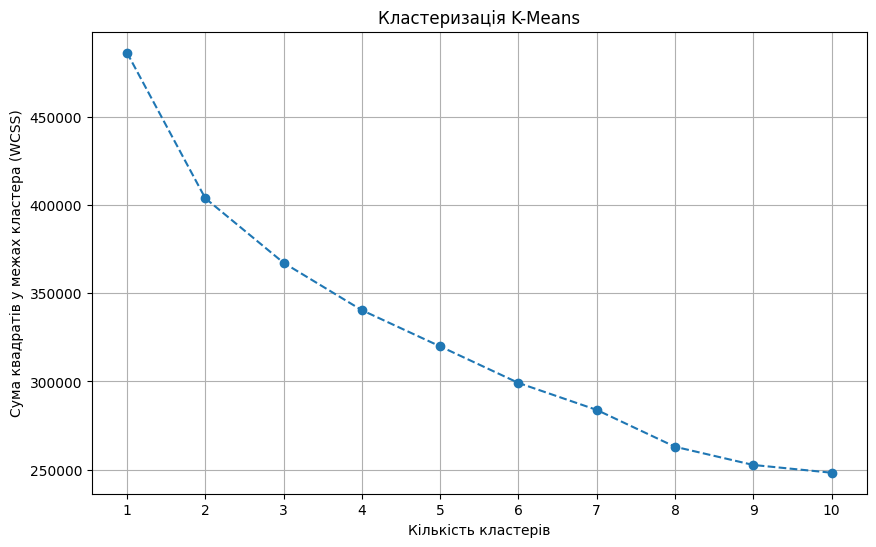

In [ ]:
# 3. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Кластеризація K-Means')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів у межах кластера (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

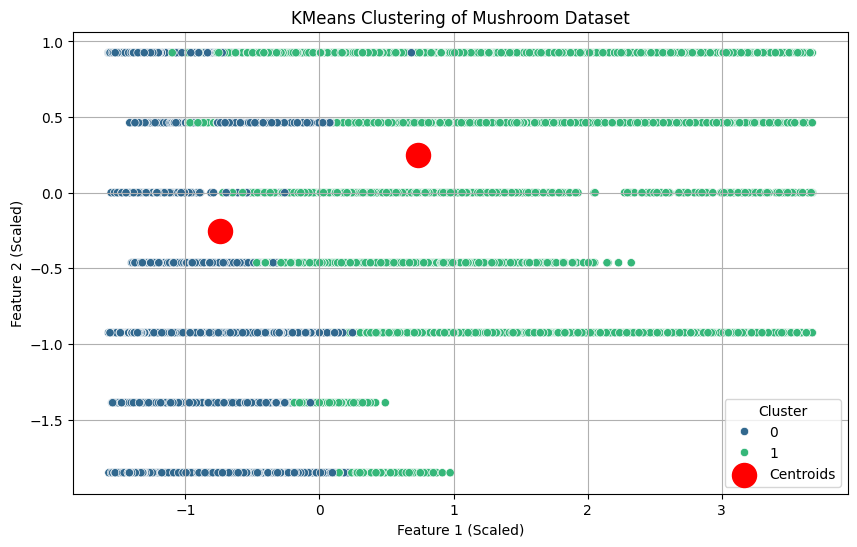

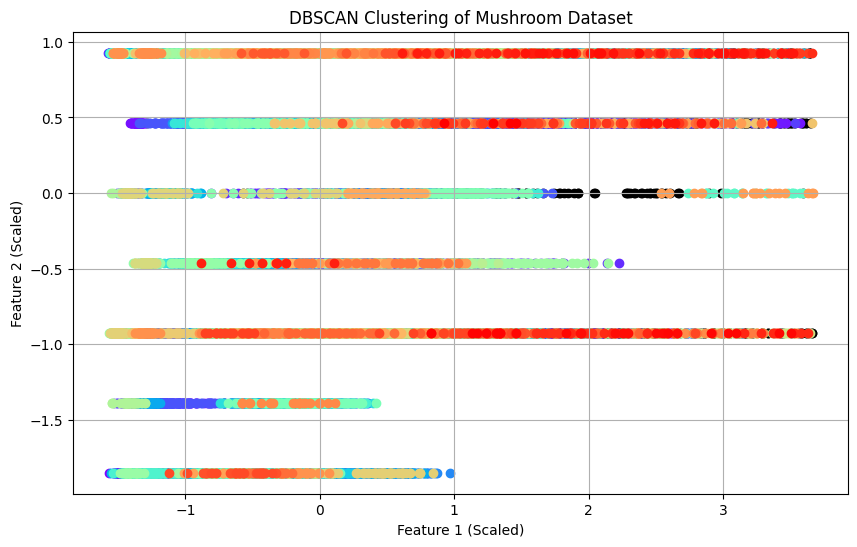

In [ ]:
# 4. Зробити візуалізацію кількості кластерів двома методами на вибір, наприклад (K-means, DBSCAN).
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering of Mushroom Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_train)

plt.figure(figsize=(10, 6))
unique_clusters = np.unique(clusters_dbscan)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster in unique_clusters:
    if cluster == -1:
        plt.scatter(X_train[clusters_dbscan == cluster, 0], X_train[clusters_dbscan == cluster, 1], color='black', label='Шум')
    else:
        plt.scatter(X_train[clusters_dbscan == cluster, 0], X_train[clusters_dbscan == cluster, 1], color=colors[cluster], label=f'Кластер {cluster}')

plt.title('DBSCAN Clustering of Mushroom Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid(True)
plt.show()